<a href="https://colab.research.google.com/github/Richleo/Colab/blob/master/TestShape_20210112_source_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
###############################################################
# BASEBALL_범주형_템플릿_20210103.ipynb 에서 하드코딩으로 성공
###############################################################

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
#from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from numpy import zeros, newaxis
from sklearn.model_selection import train_test_split, cross_val_score

tf.random.set_seed(777)

#https://towardsdatascience.com/building-a-one-hot-encoding-layer-with-tensorflow-f907d686bf39
#https://data-newbie.tistory.com/260
#OneHotEncoder(sparse=False, categorical_features=[2, 3, 8])
#이렇게 하면, index가 2, 3, 8인 feature가 categorical임을 의미한다.



#np.array 관련 url : https://iludaslab.tistory.com/44

In [2]:
baseball = np.array([
  [20190402,	'jamsil',	1,	'1',	'kt',		'dusan',	'kt_idaeeun_1989-03-23',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190402,	'jamsil',	3,	'1',	'kt',		'dusan',	'kt_idaeeun_1989-03-23',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	0]
, [20190402,	'jamsil',	5,	'1',	'kt',		'dusan',	'kt_eomsangbaek_1996-10-04',		'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	0]
, [20190402,	'jamsil',	7,	'1',	'kt',		'dusan',	'kt_eomsangbaek_1996-10-04',		'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	0]
, [20190403,	'jamsil',	2,	'1',	'kt',		'dusan',	'kt_gimmin_1999-04-14',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190403,	'jamsil',	4,	'1',	'kt',		'dusan',	'kt_gimmin_1999-04-14',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	0]
, [20190403,	'jamsil',	6,	'1',	'kt',		'dusan',	'kt_gimmin_1999-04-14',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	4]
, [20190403,	'jamsil',	8,	'1',	'kt',		'dusan',	'kt_jugwon_1995-05-31',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	0]
, [20190404,	'jamsil',	2,	'1',	'kt',		'dusan',	'kt_kuebaseu_1990-10-14',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	0]
, [20190404,	'jamsil',	4,	'1',	'kt',		'dusan',	'kt_kuebaseu_1990-10-14',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	0]
, [20190404,	'jamsil',	6,	'1',	'kt',		'dusan',	'kt_kuebaseu_1990-10-14',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	0]
, [20190404,	'jamsil',	8,	'1',	'kt',		'dusan',	'kt_baejeseong_1996-09-29',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190405,	'jamsil',	2,	'1',	'nc',		'dusan',	'nc_ruchinseuki_1988-12-30',		'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	0]
, [20190405,	'jamsil',	5,	'1',	'nc',		'dusan',	'nc_ruchinseuki_1988-12-30',		'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	0]
, [20190406,	'jamsil',	2,	'1',	'nc',		'dusan',	'nc_ijaehak_1990-10-04',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190406,	'jamsil',	3,	'1',	'nc',		'dusan',	'nc_ijaehak_1990-10-04',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190406,	'jamsil',	5,	'1',	'nc',		'dusan',	'nc_ijaehak_1990-10-04',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	0]
, [20190406,	'jamsil',	7,	'1',	'nc',		'dusan',	'nc_gangyungu_1990-07-10',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190406,	'jamsil',	9,	'1',	'nc',		'dusan',	'nc_wonjonghyeon_1987-07-31',		'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	0]
, [20190407,	'jamsil',	2,	'1',	'nc',		'dusan',	'nc_gimyeonggyu_2000-02-10',		'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	0]
, [20190407,	'jamsil',	5,	'1',	'nc',		'dusan',	'nc_gimyeonggyu_2000-02-10',		'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	0]
, [20190407,	'jamsil',	6,	'1',	'nc',		'dusan',	'nc_gangyungu_1990-07-10',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190407,	'jamsil',	8,	'1',	'nc',		'dusan',	'nc_baejaehwan_1995-02-24',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190412,	'jamsil',	3,	'0',	'lg',		'dusan',	'lg_chauchan_1987-05-31',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	1]
, [20190412,	'jamsil',	5,	'0',	'lg',		'dusan',	'lg_chauchan_1987-05-31',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	1]
, [20190412,	'jamsil',	7,	'0',	'lg',		'dusan',	'lg_chauchan_1987-05-31',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	0]
, [20190412,	'jamsil',	9,	'0',	'lg',		'dusan',	'lg_jeongchanheon_1990-01-26',		'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	0]
, [20190413,	'jamsil',	1,	'0',	'lg',		'dusan',	'lg_imchangyu_1992-11-20',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190413,	'jamsil',	2,	'0',	'lg',		'dusan',	'lg_imchangyu_1992-11-20',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	0]
, [20190413,	'jamsil',	4,	'0',	'lg',		'dusan',	'lg_imchangyu_1992-11-20',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	0]
, [20190413,	'jamsil',	6,	'0',	'lg',		'dusan',	'lg_jinhaesu_1986-06-26',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	0]
, [20190413,	'jamsil',	8,	'0',	'lg',		'dusan',	'lg_iuchan_1992-08-04',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	0]
, [20190414,	'jamsil',	2,	'0',	'lg',		'dusan',	'lg_baejaejun_1994-11-24',			'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'0',	0]
, [20190414,	'jamsil',	4,	'0',	'lg',		'dusan',	'lg_baejaejun_1994-11-24',			'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'0',	2]
, [20190414,	'jamsil',	5,	'0',	'lg',		'dusan',	'lg_choedonghwan_1989-09-19',		'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'1',	1]
, [20190414,	'jamsil',	6,	'0',	'lg',		'dusan',	'lg_gimdaehyeon_1997-03-08',		'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'1',	1]
, [20190414,	'jamsil',	8,	'0',	'lg',		'dusan',	'lg_sinjeongrak_1987-05-13',		'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'0',	0]
, [20190416,	'jamsil',	2,	'1',	'sk',		'dusan',	'sk_gimgwanghyeon_1988-07-22',		'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'0',	0]
, [20190416,	'jamsil',	4,	'1',	'sk',		'dusan',	'sk_gimgwanghyeon_1988-07-22',		'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'0',	2]
, [20190416,	'jamsil',	6,	'1',	'sk',		'dusan',	'sk_gimgwanghyeon_1988-07-22',		'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'1',	0]
, [20190416,	'jamsil',	7,	'1',	'sk',		'dusan',	'sk_seojinyong_1992-10-02',			'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'1',	1]
, [20190417,	'jamsil',	1,	'1',	'sk',		'dusan',	'sk_sancheseu_1989-11-28',			'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'1',	1]
, [20190417,	'jamsil',	2,	'1',	'sk',		'dusan',	'sk_sancheseu_1989-11-28',			'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'1',	0]
, [20190417,	'jamsil',	4,	'1',	'sk',		'dusan',	'sk_sancheseu_1989-11-28',			'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'1',	0]
, [20190417,	'jamsil',	6,	'1',	'sk',		'dusan',	'sk_bakminho_1992-02-25',			'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'1',	2]
, [20190417,	'jamsil',	8,	'1',	'sk',		'dusan',	'sk_bakjeongbae_1982-04-01',		'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'0',	0]
, [20190418,	'jamsil',	2,	'1',	'sk',		'dusan',	'sk_daikson_1994-07-02',			'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'0',	0]
, [20190418,	'jamsil',	4,	'1',	'sk',		'dusan',	'sk_daikson_1994-07-02',			'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'0',	1]
, [20190418,	'jamsil',	6,	'1',	'sk',		'dusan',	'sk_daikson_1994-07-02',			'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'1',	1]
, [20190418,	'jamsil',	8,	'1',	'sk',		'dusan',	'sk_jeongyeongil_1988-11-16',		'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'1',	0]
, [20190426,	'jamsil',	2,	'1',	'rotde',	'dusan',	'rotde_tomson_1994-01-31',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190426,	'jamsil',	4,	'1',	'rotde',	'dusan',	'rotde_tomson_1994-01-31',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	0]
, [20190426,	'jamsil',	5,	'1',	'rotde',	'dusan',	'rotde_jeongseongjong_1995-11-16',	'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190426,	'jamsil',	6,	'1',	'rotde',	'dusan',	'rotde_jeongseongjong_1995-11-16',	'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	0]
, [20190426,	'jamsil',	8,	'1',	'rotde',	'dusan',	'rotde_gimhyeonsu_2000-07-10',		'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	0]
, [20190427,	'jamsil',	8,	'1',	'rotde',	'dusan',	'rotde_ohyeontaek_1985-07-17',		'dusan_heogyeongmin_1990-08-26',	2 ,	'10',	'0',	2]
, [20190428,	'jamsil',	1,	'1',	'rotde',	'dusan',	'rotde_gimwonjung_1993-06-14',		'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	0]
, [20190428,	'jamsil',	3,	'1',	'rotde',	'dusan',	'rotde_gimwonjung_1993-06-14',		'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190428,	'jamsil',	4,	'1',	'rotde',	'dusan',	'rotde_bakgeunhong_1985-08-22',		'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	0]
, [20190428,	'jamsil',	6,	'1',	'rotde',	'dusan',	'rotde_jeongseongjong_1995-11-16',	'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	0]
, [20190428,	'jamsil',	8,	'1',	'rotde',	'dusan',	'rotde_guseungmin_1990-06-12',		'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
                  ]
                # , dtype='datetime64, string_, int64, string_, string_, string_, int64, string_')  
                # , dtype=[      ('DATE',            'int64')
                #            ,   ('VENUE_ENG',       'string_')
                #            ,   ('INNING',          'int64')
                #            ,   ('INNING_FG',       'string_')
                #            ,   ('PITCHER_TEAM_ENG','string_')
                #            ,   ('BATTER_TEAM_ENG', 'string_')
                #            ,   ('PITCHER_ID',      'string_')
                #            ,   ('BATTER_ID',       'string_')
                #            ,   ('BATTER_ORDER',    'int64')
                #            ,   ('BATTER_POSITION', 'string_')
                #            ,   ('BASE_STATUS',     'string_')
                #            ,   ('RESULT_NUMBER',   'int64')
                #            
                #            ])
                , dtype=object)
                #, dtype= {'names'   :['DATE',   'VENUE_ENG', 'INNING', 'INNING_FG', 'PITCHER_TEAM_ENG', 'BATTER_TEAM_ENG',  'PITCHER_ID',   'BATTER_ID','BATTER_ORDER', 'BATTER_POSITION',  'BASE_STATUS', 'RESULT_NUMBER']
                #        , 'formats' :[ 'object','object',   'object',   'object', 'object',          'object',          'object',      'object',  'object',      'object',          'object',     'object']
                #        }
                #    )

#x_cols = ['DATE', 'VENUE_ENG', 'INNING', 'INNING_FG', 'PITCHER_TEAM_ENG', 'BATTER_TEAM_ENG','PITCHER_ID', 'BATTER_ID','BATTER_ORDER', 'BATTER_POSITION', 'BASE_STATUS']
tempSplitedBaseball = np.hsplit(baseball, [11])



#print(tempSplitedBaseball[0])
#y_baseball = baseball['RESULT_NUMBER']

#print(type(tempSplitedBaseball[0]))

ct = ColumnTransformer([("batter_attribute", OneHotEncoder(), [1, 3, 4, 5, 6, 7, 9, 10])], remainder = 'passthrough')
x_baseball_matrix = ct.fit_transform(tempSplitedBaseball[0])
y_baseball = tempSplitedBaseball[1]
#x_baseball = np.atleast_2d(x_baseball_matrix)

#df = pd.DataFrame(x_baseball_matrix)
#print(df.head())

#hot_encoder = OneHotEncoder(categorical_features = [0])
#x = hot_encoder.fit_transform(x).toarray()

print(type(x_baseball_matrix))
print(x_baseball_matrix.shape)

#x_baseball = []
#for i in range(x_baseball_matrix.shape[0]):
#    for j in range(x_baseball_matrix.shape[1]):
#        print(x_baseball_matrix[i, j], end=' ')
#    print('\r\n')
x_baseball = []
for i in range(x_baseball_matrix.shape[0]):
    tempOneRow = []
    for j in range(x_baseball_matrix.shape[1]):
        tempOneRow.append(x_baseball_matrix[i, j])
    x_baseball.append(tempOneRow)


#print(type(baseball))
#print(type(tempSplitedBaseball))
#print(type(x_baseball))

x_baseball = np.array(x_baseball)

print(x_baseball.ndim)
print(x_baseball.size)
print(x_baseball[x_baseball.ndim - 1].size)

<class 'scipy.sparse.csr.csr_matrix'>
(61, 52)
2
3172
52


In [3]:
##########모델 생성
x_train, x_test, y_train, y_test = train_test_split(x_baseball,y_baseball, test_size = 0.2)

print(type(x_baseball))
print(type(x_train))

##테스트 데이터가 36행 이상이면 오류가 발생
x_train_array_reshape = np.reshape(x_train, (x_train.shape[0], -1, x_train.shape[1]))
x_train_array_reshape = x_train[:, np.newaxis, :]
x_test_array_reshape  = x_test[:, np.newaxis, :]

model_size_columns = x_train[x_train.ndim - 1].size

# Make Model
layer_input  = tf.keras.Input(shape=(1, model_size_columns), name='input')
layer_rnn    = tf.keras.layers.SimpleRNN(100, name='RNN')(layer_input)
layer_output = tf.keras.layers.Dense(1, name='output')(layer_rnn)

model = tf.keras.Model(layer_input, layer_output)
model.summary()

# Complier
model.compile(loss = 'mse', optimizer='adam', metrics=['accuracy'])
model._name = 'many_to_one'


#model.summary()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 1, 52)]           0         
_________________________________________________________________
RNN (SimpleRNN)              (None, 100)               15300     
_________________________________________________________________
output (Dense)               (None, 1)                 101       
Total params: 15,401
Trainable params: 15,401
Non-trainable params: 0
_________________________________________________________________


In [4]:
###################################################################################################
## test 데이터를 맞추려면, 적어도 epochs=10000 은 해야 함. batch_size를 1로 했을 때
###################################################################################################

X = np.asarray(x_train_array_reshape).astype(np.float32) 
Y = np.asarray(y_train).astype(np.float32)

x_test_for_compare = np.asarray(x_test_array_reshape).astype(np.float32) 

##########모델 학습
hist = model.fit(X, Y, epochs=2000, batch_size=1) 


history_dict = hist.history

Epoch 1/2000
48/48 [==============================] - 1s 2ms/step - loss: 1.2570 - accuracy: 0.2487
Epoch 2/2000
48/48 [==============================] - 0s 1ms/step - loss: 0.6236 - accuracy: 0.3615
Epoch 3/2000
48/48 [==============================] - 0s 1ms/step - loss: 0.4882 - accuracy: 0.5024
Epoch 4/2000
48/48 [==============================] - 0s 2ms/step - loss: 1.0666 - accuracy: 0.4567
Epoch 5/2000
48/48 [==============================] - 0s 2ms/step - loss: 0.2822 - accuracy: 0.5808
Epoch 6/2000
48/48 [==============================] - 0s 2ms/step - loss: 0.3626 - accuracy: 0.6290
Epoch 7/2000
48/48 [==============================] - 0s 2ms/step - loss: 0.7249 - accuracy: 0.4066
Epoch 8/2000
48/48 [==============================] - 0s 2ms/step - loss: 0.7166 - accuracy: 0.4196
Epoch 9/2000
48/48 [==============================] - 0s 2ms/step - loss: 0.7074 - accuracy: 0.4412
Epoch 10/2000
48/48 [==============================] - 0s 2ms/step - loss: 0.7622 - accuracy: 0.4502

[[0]
 [2]
 [1]
 [1]
 [0]
 [0]
 [2]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]
[[0.48043793]
 [0.48043793]
 [0.48043793]
 [0.48043793]
 [0.48043793]
 [0.48043793]
 [0.48043793]
 [0.48043793]
 [0.48043793]
 [0.48043793]
 [0.48043793]
 [0.48043793]
 [0.48043793]]


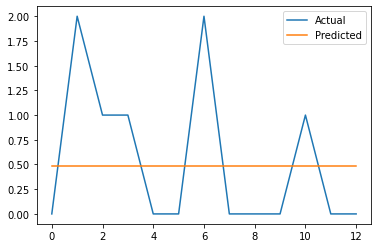

In [5]:
##########모델 예측

y_pred = model.predict(x_test_for_compare)


##########모델 검증 (정답과 예측치 비교)

print(y_test)
print(y_pred)

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

%matplotlib inline


plt.plot(y_test)
plt.plot(y_pred)
plt.legend(["Actual", "Predicted"])
plt.show()

In [ ]:
from numpy import *

x = array(range(1,403))

dataset = []
for i in range(5):
    dataset.append(x)

target = [x[401] for x in dataset]
train = [x[0:400] for x in dataset]

print(x)
print(dataset)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24